### import data

In [402]:
import pandas as pd
import urllib.request

# # load data from github
# data_url = 'https://raw.githubusercontent.com/ebauch/NV_data/master/T2star_survey.csv'
# data = urllib.request.urlopen(data_url)
# pd.read_csv(data, encoding='latin1', header=0)
# df

# if data is saved locally as csv uncomment lines below
file = 'T2star_survey.csv'
df = pd.read_csv(file, encoding='latin1', header=0)
df

,Defect,Host,Concentration (cm^-3),Interrogated Spins,T2* (us),FOM (us),Bath,Reference,Comment,Where to Find
0,NV-,Diamond,2.5E+12,2.5E+04,68,1.70E+06,"0.05 ppm N, 0.01% 13C",Bauch 2017,double quantum,NaN
1,NV-,Diamond,1E+15,1.0E+07,58,5.80E+08,"0.75 ppm N, 0.01% 13C",Bauch 2017,double quantum + spin bath driving,NaN
2,NV-,Diamond,1E+16,1.0E+07,5,5.00E+07,"10 ppm N, 0.05% 13C",Bauch 2017,double quantum + spin bath driving,NaN
3,NV,Diamond,7E+17,5.3E+11,0.15,7.88E+10,"< 100 ppm N, 1.1 13C%",Acosta 2010,NaN,3rd paragraph
4,NV,Diamond,2.8E+18,2.2E+08,0.1,2.18E+07,"< 100 ppm N, 1.1 13C%",Acosta 2009,NaN,abstract
5,SiV0,Diamond,ensemble,n/a,ask Natalie,n/a,1.1% 13C,Rose 2017,cryogenic temperatures,NaN
6,P,Silicon,1.00E+15,1.0E+15,1.8,1.80E+15,0.08% 29Si,Abe 2010,"cryogenic temperatures, EPR",NaN
7,PL5,Silicon Carbide,ensemble,n/a,2,n/a,"4.7% 29Si, 1.1% 13C",Zhou 2017,worked in strain basis to protect against magn...,NaN
8,PL6,Silicon Carbide,2.8E+18,1.0E+03,0.3,3.00E+02,"4.7% 29Si, 1.1% 13C (likely)",Klimov 2015,NaN,supplement S4
9,PL?,Silicon Carbide,ensemble,n/a,1.44,NaN,"4.7% 29Si, 1.1% 13C (likely)",Koehl 2011,cryogenic temperatures,"Fig. 2b, 3c"


### generate plots

In [403]:
# number of interrogated spins
x = pd.to_numeric(df.iloc[:,3], 'coerce').get_values()
# T2* in us
y1 = pd.to_numeric(df.iloc[:,4], 'coerce').get_values()
# FOM
y2 = pd.to_numeric(df.iloc[:,5], 'coerce').get_values()
# reference + remove spaces
labels = df.iloc[:,7]
labels = [label.replace(" ","") for label in labels]

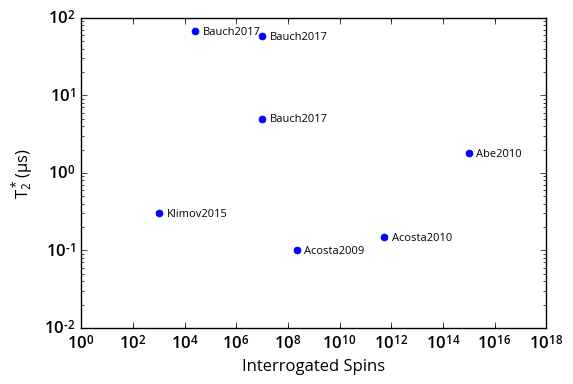

In [404]:
## generate T2* plot

pick = [0, 1, 2, 3, 4, 6, 8] # pick good data points

# plot data + labels
plt.plot(x[pick], y1[pick], 'b.', ms=10)
for i in pick:
    plt.text(x[i]*2, y1[i]*(0.99), labels[i], fontsize=8, fontweight='normal', va='center', ha='left')

# set plot labels

plt.xlabel('Interrogated Spins')
plt.ylabel(r'$T_2^* (\mu$s)')

plt.xscale('log')
plt.yscale('log')

plt.xlim([10**0, 10**18])
plt.ylim([10**-2, 100])

plt.savefig("fig.pdf")

plt.show()

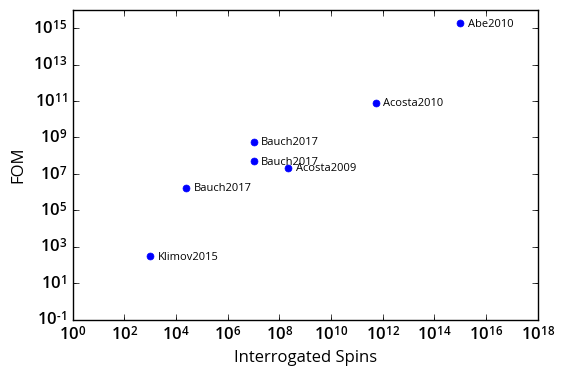

In [406]:
# generate FOM plot

# plot data + labels
plt.plot(x[pick], y2[pick], 'b.', ms=10)
for i in pick:
    plt.text(x[i]*2, y2[i] * 0.9, labels[i], fontsize=8, fontweight='normal', va='center', ha='left')

# set plot labels
plt.xlabel('Interrogated Spins')
plt.ylabel(r'FOM')

plt.xscale('log')
plt.yscale('log')

plt.xlim([10**0, 10**18])
plt.ylim([10**-1, 10**16])

plt.savefig("fig2.pdf")

plt.show()

# extracted spin concentrations (where available)

In [243]:
um3 = 10**-12 # qubic micron in qubic cm

Acosta, V. M., Bauch, E., Jarmola, A., Zipp, L. J., Ledbetter, M. P., & Budker, D. (2010). Broadband magnetometry by infrared-absorption detection of nitrogen-vacancy ensembles in diamond. Applied Physics Letters, 97(17). http://doi.org/10.1063/1.3507884

In [245]:
detectionVol = 50 * 50 * 300 * um3
concentration = 7e17 # cm^-3
'%e' %  (detectionVol * concentration)

'5.250000e+11'

Acosta, V. M., Bauch, E., Ledbetter, M. P., Santori, C., Fu, K. M. C., Barclay, P. E., … Budker, D. (2009). Diamonds with a high density of nitrogen-vacancy centers for magnetometry applications. Physical Review B - Condensed Matter and Materials Physics, 80(11), 1–15. https://doi.org/10.1103/PhysRevB.80.115202

In [246]:
detectionVol = 0.5 * 0.5 * 300 * um3
concentration = 2.8e18 # cm^-3
'%e' %  (detectionVol * concentration)

'2.100000e+08'

Klimov, P. V, Falk, A. L., Christle, D. J., Dobrovitski, V. V, & Awschalom, D. D. (2015). Quantum entanglement at ambient conditions in a macroscopic solid-state spin ensemble. Sci. Adv., 1(1), 1–8. http://doi.org/10.1126/sciadv.1501015



In [247]:
detectionVol = 40 * um3
spins = 10**3
concentraton = '%e' %  (spins * detectionVol)
concentration

2.8e+18